In [76]:
#working on getting the data to fold
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

In [217]:
'''
giving a fitter, returns an array of the fitted lorentzian1 parameters - should add errors
arg: my_fitter = fit, x = integer value offset

'''
def getFits(my_fitter, x):
    results = my_fitter.results
    E0 = [results[0][0+3*x]]
    gamma = [results[0][1+3*x]]
    A = [results[0][2+3*x]]
    B = [results[0][3+3*x]]
    
    return [E0, gamma, A, B]

'''
folds data on to first 256 channels (LHS<-RHS)
returns: array of [yData, yErrors]
'''
def fold(data_c, dataE):
    center = 256
    data = []
    dataErr = []
    
    for i in range(0, center):
        data.append(data_c[i]+data_c[511-i])
#         print(i, 511-i)
        dataErr.append(np.sqrt(dataE[i]+dataE[511-i]))
    
    return [data, dataErr]

#one lorentzians with offset
def lorentzian(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma**2/denom + b

#2 lorentzians added together with one offset
def lorentzian2(E, E0, gamma, A, E0_2, gamma_2, A_2, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + b

#6 lorentzians added together with one offset
def lorentzian6(E, E0, gamma, A, E0_2, gamma_2, A_2, E0_3, gamma_3, A_3, E0_4, gamma_4, A_4, E0_5, gamma_5, A_5, E0_6, gamma_6, A_6, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2
    denom_3 = (E-E0_3)**2 + (gamma_3/2)**2
    denom_4 = (E-E0_4)**2 + (gamma_4/2)**2
    denom_5 = (E-E0_5)**2 + (gamma_5/2)**2
    denom_6 = (E-E0_6)**2 + (gamma_6/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_4*gamma_4**2/denom_4 + A_5*gamma_5**2/denom_5 + A_6*gamma_6**2/denom_6 + b

In [218]:
#testing with stainlessSteel data which only has one peak
data = np.loadtxt(".//data//StainlessSteelFoil_Jan13_fullData.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]


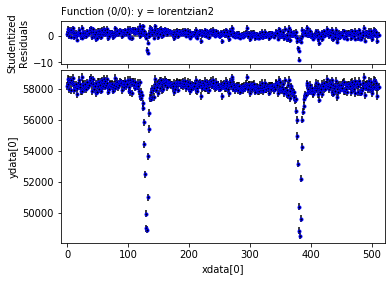

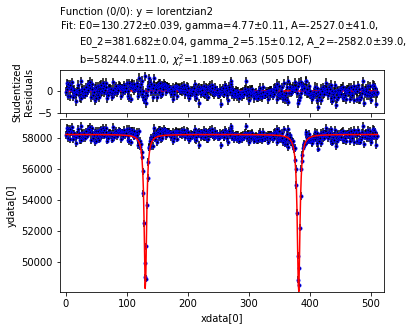


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 2.482 +/- 0.063, 505.0 DOF)
  E0         = 130.0
  gamma      = 5.0
  A          = -2300.0
  E0_2       = 382.0
  gamma_2    = 5.0
  A_2        = -2300.0
  b          = 58000.0

FIT 

In [212]:
# lorentzian2 - for fitting 2
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian2, p='E0=130,gamma=5,A=-2300,E0_2=382,gamma_2=5,A_2=-2300,b=58000')
my_fitter.set_data(xdata=data[0], ydata=data[1], eydata=ydataerr)
my_fitter.fit()

In [213]:
# # fitLS, fitRS

# center = (fitRS[0][0] - fitLS[0][0]) / 2.0 + fitLS[0][0]
# print(center)

# 512/2

# output:
# 255.97671345493336

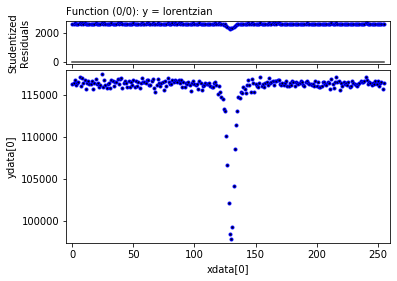

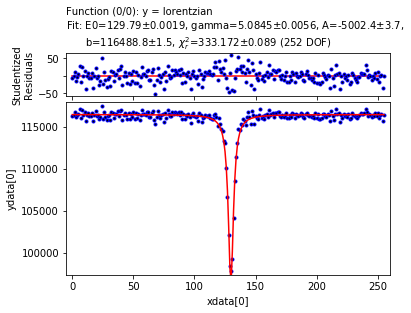


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 7137813.47 +/- 0.089, 252.0 DOF)
  E0         = 130.0
  gamma      = 5.0
  A          = -2300.0
  b          = 58000.0

FIT RESULTS (reduced chi^2 = 333.172 +/- 0.089, 252 DOF)
  E0 

In [214]:
#512 channels
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
# help(s.data.fitter)
my_fitter.set_functions(f=lorentzian, p='E0=130,gamma=5,A=-2300,b=58000')
my_fitter.set_data(xdata=foldedData[0], ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()

In [219]:
#fitting folded calibration data - REALLY big chi squared
data = np.loadtxt(".//data//Calibration_Jan14_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2

#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]

#literature values (from 1-6), (mm/sec)
#Cite as: Journal of Applied Physics 42, 4339 (1971); https://doi.org/10.1063/1.1659777
litValCal = [-5.4823, -3.2473, -1.0132, 0.6624, 2.8967, 5.1338]

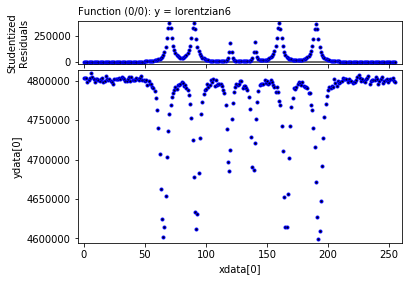

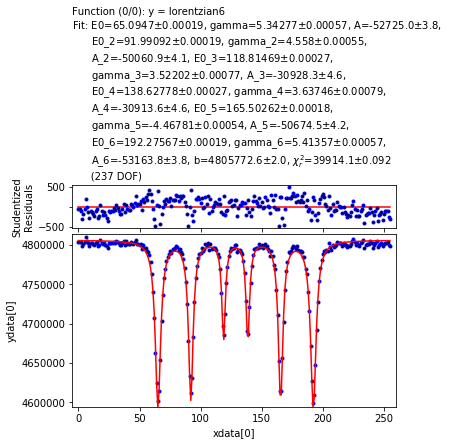


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 9448381338.999 +/- 0.092, 237.0 DOF)
  E0         = 70.0
  gamma      = 5.0
  A          = -2000000.0
  E0_2       = 90.0
  gamma_2    = 5.0
  A_2        = -2000000.0
  E0_3       = 

In [155]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)

guess = 'E0=70,gamma=5,A=-2e6, E0_2=90, gamma_2=5, A_2=-2e6, E0_3=120, gamma_3=2, A_3=-1e6, E0_4=140, gamma_4=2, A_4=-1e6, E0_5=160, gamma_5=5, A_5=-2e6, E0_6=190, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=foldedData[0], ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()


In [182]:
data = np.loadtxt(".//data//Calibration_Jan14_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])


dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]
dataR = [data[0][256:512], data[1][256:512], ydataerr[256:512]]

print(len(dataR[0]), len(dataL[0]))
# data[0][511]

256 256


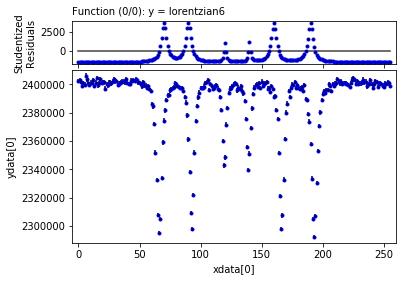

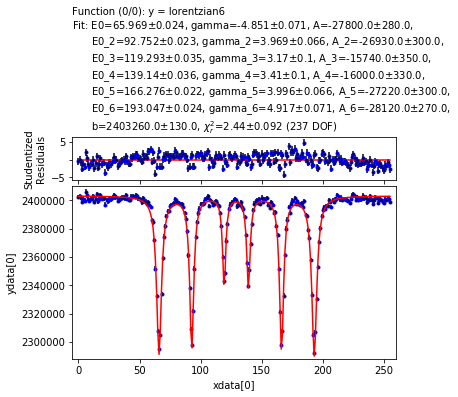

In [184]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)

guess = 'E0=70,gamma=5,A=-2e6, E0_2=90, gamma_2=5, A_2=-2e6, E0_3=120, gamma_3=2, A_3=-1e6, E0_4=140, gamma_4=2, A_4=-1e6, E0_5=160, gamma_5=5, A_5=-2e6, E0_6=190, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=dataL[0], ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()

resultsLS = getFits(my_fitter, 0)

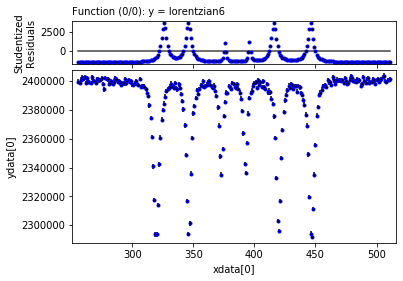

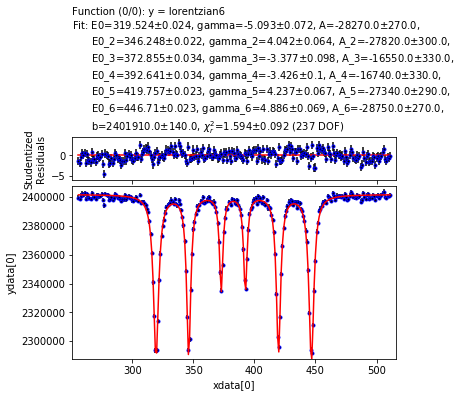

In [231]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)

guess = 'E0=326,gamma=5,A=-2e6, E0_2=346, gamma_2=5, A_2=-2e6, E0_3=376, gamma_3=2, A_3=-1e6, E0_4=396, gamma_4=2, A_4=-1e6, E0_5=416, gamma_5=5, A_5=-2e6, E0_6=446, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=dataR[0], ydata=dataR[1], eydata=dataR[2])
my_fitter.fit()

resultsRS = getFits(my_fitter, 5)

In [232]:
center = (resultsRS[0][0] - resultsLS[0][0]) / 2.0 + resultsLS[0][0]
print(center)

256.33926095692516


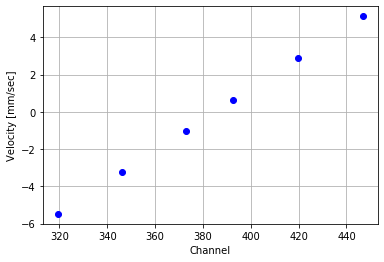

In [234]:
#matching to lit. values
peaksL = [getFits(my_fitter, 0)[0], getFits(my_fitter, 1)[0], getFits(my_fitter, 2)[0], getFits(my_fitter, 3)[0], getFits(my_fitter, 4)[0], getFits(my_fitter, 5)[0] ]
# litValCal
plt.plot(peaksL, litValCal, color='b', label='', linestyle='', marker='o')
plt.grid()
plt.ylabel('Velocity [mm/sec]')
plt.xlabel('Channel')
plt.show()

In [236]:

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
# help(s.data.fitter)
my_fitter.set_functions(f='m*x+b', p='m, b')
my_fitter.set_data(xdata=peaksL, ydata=litValCal, eydata=dataR[2][0:5])
my_fitter.fit()

AttributeError: 'numpy.ndarray' object has no attribute 'append'